In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.optimize as spo
import scipy as sc
import sympy as sp
np.set_printoptions(suppress=True, linewidth= 500)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [55]:
# --- Formatação da figura ---
cm          = 1/2.54  # centimeters in inches
figsize     = ( 12*cm, 10*cm )
dpi         = 100

# --- Texto que apareça no gráfico ---
fontsize        = 8
legend_label    = "Pontos Experimentais"
xlabel          = ""
ylabel          = "$\|\epsilon| $(mV)"

# --- Formação dos pontos ---
marker_type = "."
markersize  = 2.5
color_mk    = "lime"


# --- formatação da escala do gráfico ---
xticks      = np.linspace( - 1 , 1 , 10 )
yticks      = np.linspace( -20 , 20 , 9)

# --- Transparência da grid ---
alpha_grid = 0.5 

# --- Formatação barras de erro --- 
color_bars    = "k"
alpha_bars    = 0.5
thickness     = 1 
head_size     = 1 
head_thick    = 0.2 

# --- Informação para guardar a imagem ---
fig_name = "fig1" #sem o png!


# --- data para dar plot ---
#data_x = ...
#data_y = ...
#u x    = ...
#u_y    = ...

# 1ª Parte 

In [79]:
data_10 = np.genfromtxt( "CSV\parte_1.0.csv" , delimiter = "," , skip_header = True )
data_11 = np.genfromtxt( "CSV\parte_1.1.csv" , delimiter = ",", skip_header = True )
data_11 = data_11[ : , :4]
data_10 = data_10[ : , :5]

# usamos os valores retirados do protocolo porque nos esquecemos de usar o palmer para medir a espessura do fio! 
h0       = 5.5e-3 # m 
lambda0 = 632.8e-9 # m 
nar_t   = 1.00029 # não vale a pena procurar os valores correspondentes à temperatura e pressão da sala.
                  # não vamos ter precisão suficiente para notar diferenças a esse nível 



In [80]:
udeltad = 0.01e-4 
uN      = 5
N       = data_10[:,2]


deltad = np.abs(data_10[:,4]-data_10[:,3]) * 1e-4

markersize = 7
fontsize   = 12

n ar = 0.80
u(n)    = 0.09
u(n)%   = 11%
err(n)  = 20%


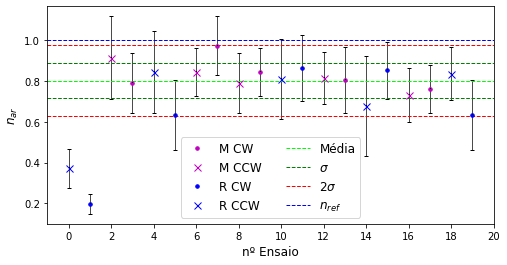

In [81]:
# análise parte 1.0
n      = data_10[ :,2 ] * lambda0 / deltad * 0.5 
un     = n * np.sqrt( ( uN / N ) ** 2 + ( udeltad / deltad )** 2 )
len_n = len( n )
N = data_10[ : , 2 ]
uN = 5 


indM   = data_10[:,0]==0
indR   = data_10[:,0]==1
indCW  = data_10[:,1]==0
indCCW = data_10[:,1]==1

indMCCW = indM * indCCW
indMCW  = indM * indCW
indRCCW = indR * indCCW
indRCW  = indR * indCW

fig10 , ax10 = plt.subplots( figsize = ( 8 , 4 ) ) 

nensaio = np.arange( len( n )  )

ax10.errorbar( nensaio , n , yerr = un , fmt = "k," , elinewidth = 0.7  , capsize = 2 )

ax10.plot( nensaio[indMCW] ,n[indMCW] ,"m." , 
        label = "M CW" , markersize = markersize  )
ax10.plot( nensaio[indMCCW] , n[indMCCW] ,"mx" , 
        label = "M CCW" , markersize = markersize  )

ax10.plot( nensaio[indRCW] , n[indRCW] , "b." , 
        label = "R CW" , markersize = markersize  )
ax10.plot( nensaio[indRCCW] , n[indRCCW] , "bx" ,
        label = "R CCW" , markersize = markersize  )


mean_val = np.mean( n[2:])
std_val  = np.std( n[2:])


ax10.hlines( mean_val          , -1 , len_n , 
          color = "lime",linewidth = 1, 
          linestyle = "--", label = "Média")

ax10.hlines( mean_val - std_val, -1 , len_n  ,
          color = "green",linewidth = 1, 
          linestyle = "--", label = r"$\sigma$")

ax10.hlines( mean_val + std_val,-1 , len_n  ,
          color = "green",linewidth = 1, 
          linestyle = "--")    
ax10.hlines( mean_val - std_val*2,-1 , len_n  ,
          color = "red", linewidth = 1, 
          linestyle = "--", label = r"$2\sigma$")

ax10.hlines( mean_val + std_val*2,-1 , len_n  ,
          color ="red" , linewidth = 1, 
          linestyle = "--") 

ax10.hlines(1, -1,len_n  ,
          color ="blue", linewidth = 1, 
          linestyle = "--" , label = r"$n_{ref}$")


nensaio = np.append( nensaio  ,len_n)
ax10.set_xticks( nensaio[::2] ) 
ax10.set_xlim( -1 , len_n )
ax10.set_xlabel( "nº Ensaio", fontsize = fontsize )
ax10.set_ylabel( r"$n_{ar}$", fontsize = fontsize )

un = n * np.sqrt( ( uN / N )**2 + ( udeltad / deltad )**2)

ax10.legend( fontsize = fontsize , ncol = 2 )




#ax10.annotate("",
#            xy=(0.4, 0.37), xycoords='data',
#            xytext=(4, 0.3), textcoords='data',
#            arrowprops=dict(arrowstyle="->",
#                            connectionstyle="arc3"),
#            )
#
#ax10.annotate("Retirados \nda análise",
#            xy=(1.2, 0.21), xycoords='data',
#            xytext=(4, 0.3), textcoords='data',
#            arrowprops=dict(arrowstyle="->",
#                            connectionstyle="arc3"),
#            )


print( "n ar = {:.2f}".format(mean_val)  )
print( "u(n)    = {:.2f}".format(std_val) )
print( "u(n)%   = {:.0f}%".format(std_val / mean_val * 100))
print( "err(n)  = {:.0f}%".format( ( 1 - mean_val ) * 100 ))
plt.show()

### Análise por ajuste linear

$$
N = m\Delta d + b 
$$

Onde 

$$
n_{ar}= m\lambda_0 / 2 \quad, b =0
$$

n ar = 0.9
u(n)    = 0.1
u(n)%   = 10%
err(n)  = 8%


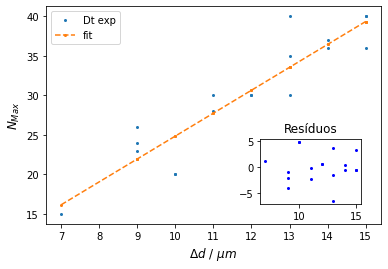

In [138]:
deltad_new , N_new = np.copy(deltad[2:]) , np.copy(N[2:])
deltad_new *= 1e6
markersize = 4 

fig_aj , ax_aj = plt.subplots( figsize = ( 6 , 4 ) )
ax_aj.plot(  deltad_new , N_new ,
           "." , label = "Dt exp",
           markersize = markersize 
          )
result = sps.linregress( deltad_new , N_new )

m , b , r , p , um = result[:]
ub = result.intercept_stderr


sorted_delta = np.copy( deltad_new )
sorted_delta = np.sort( sorted_delta )
ax_aj.plot( sorted_delta , sorted_delta * m + b ,
           ".--" , label = "fit", 
           markersize = markersize, 
          )

ax_ajres = inset_axes(ax_aj, width="30%", height="30%", loc= 4 , borderpad = 2 )
ax_ajres.plot( deltad_new , deltad_new*m+b - N_new , 
              "b." , markersize = markersize )
ax_ajres.set_title( "Resíduos")

ax_aj.set_xlabel( r"$\Delta d$ / $\mu m $" , fontsize = fontsize )
ax_aj.set_ylabel( r"$N_{Max}$" , fontsize = fontsize )
ax_aj.legend()



val = m * lambda0 *1e6 * 0.5
uval = val * um / m 


print( "n ar = {:.1f}".format(val)  )
print( "u(n)    = {:.1f}".format(uval ) )
print( "u(n)%   = {:.0f}%".format(uval / val * 100))
print( "err(n)  = {:.0f}%".format( ( 1 - val ) * 100 ))


In [31]:
# para o cálculo das incertezas
N , n , na , l , h , theta = sp.symbols( "N n n_a lambda_0 h theta")
nv = na / ( 1 - ( N * l )/ ( h * na * sp.sin( theta )**2))
nv 

n_a/(-N*lambda_0/(h*n_a*sin(theta)**2) + 1)

In [32]:
nv.diff( theta )

-2*N*lambda_0*cos(theta)/(h*(-N*lambda_0/(h*n_a*sin(theta)**2) + 1)**2*sin(theta)**3)

In [33]:
nv.diff( N )

lambda_0/(h*(-N*lambda_0/(h*n_a*sin(theta)**2) + 1)**2*sin(theta)**2)

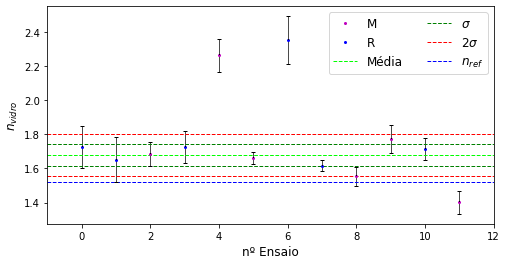

n vidro = 1.68
u(n)    = 0.06
u(n)%   = 3.7 %


In [139]:
# análise parte 1.1
theta = np.abs(data_11[ : , 3 ]-data_11[:,2])
theta_rad = theta * np.pi / 180 
utheta = 0.1 * np.pi / 180 


len_n     = len(data_11[ : , 1 ])
N         = data_11[:,1]
uN        = 5 
nv    = h0 * nar_t ** 2 * np.sin( theta_rad )**2 / ( h0 * nar_t * np.sin( theta_rad ) **2 - N* lambda0 )

# expressão da incerteza da nv 
unv = np.sqrt( (2 * N * lambda0 * np.cos( theta_rad )/\
                (h0 * np.sin( theta_rad )**3 * ( 1 - N * lambda0 /\
                ( h0 * nar_t * np.sin( theta_rad )**2))))**2 * utheta ** 2 + \
                 (lambda0 / ( h0 * np.sin( theta_rad )**2 * \
                  ( 1 - N * lambda0 / ( h0 * nar_t * np.sin( theta_rad )**2 ))))**2 * uN**2)

indM,  = np.where( data_11[:,0] == 0 )
indR,  = np.where( data_11[:,0] == 1 )


fig11 ,ax11 = plt.subplots( figsize = ( 8 , 4 ) ) 

nensaio = np.arange( len_n  )

ax11.errorbar( nensaio , nv , yerr = unv , fmt = "k," , elinewidth = 0.7  , capsize = 2 )

ax11.plot( nensaio[indM] ,nv[indM] ,"m." , 
        label = "M" , markersize = markersize  )


ax11.plot( nensaio[indR] , nv[indR] , "b." , 
        label = "R" , markersize = markersize  )


# primeira estimativa 
mean_val = np.mean( nv )
std_val  = np.std( nv )
ind, = np.where( np.abs(nv - mean_val)< 1.5 *std_val  )
nv = nv[ ind ]
# segunda estimativa 
mean_val = np.mean( nv )
std_val  = np.std( nv )

ind, = np.where( np.abs(nv - mean_val)< 1.5 *std_val  )
nv = nv[ ind ]
# segunda estimativa 
mean_val = np.mean( nv )
std_val  = np.std( nv )



ax11.hlines( mean_val          , -1 , len_n , 
          color = "lime",linewidth = 1, 
          linestyle = "--", label = "Média")

ax11.hlines( mean_val - std_val, -1 , len_n  ,
          color = "green",linewidth = 1, 
          linestyle = "--", label = r"$\sigma$")

ax11.hlines( mean_val + std_val,-1 , len_n  ,
          color = "green",linewidth = 1, 
          linestyle = "--")    
ax11.hlines( mean_val - std_val*2,-1 , len_n  ,
          color = "red", linewidth = 1, 
          linestyle = "--", label = r"$2\sigma$")

ax11.hlines( mean_val + std_val*2,-1 , len_n  ,
          color ="red" , linewidth = 1, 
          linestyle = "--") 

ax11.hlines( 1.52 ,-1 , len_n  ,
          color ="blue" , linewidth = 1, 
          linestyle = "--" , label = r"$n_{ref}$") 


nensaio = np.append( nensaio  ,len_n)
ax11.set_xticks( nensaio[::2] ) 
ax11.set_xlim( -1 , len_n )
ax11.set_xlabel( "nº Ensaio", fontsize = fontsize )
ax11.set_ylabel( r"$n_{vidro}$", fontsize = fontsize )

ax11.legend( fontsize = fontsize , ncol = 2 )

plt.show()


print( "n vidro = {:.2f}".format(mean_val)  )
print( "u(n)    = {:.2f}".format(std_val) )
print( "u(n)%   = {:.1f} %".format(std_val / mean_val * 100))

# 2ª Parte 



In [140]:
data_20 = np.genfromtxt( "CSV\parte_2.0.csv" , delimiter = "," , skip_header = True )
data_21 = np.genfromtxt( "CSV\parte_2.1.csv" , delimiter = ",", skip_header = True )
data_22 = np.genfromtxt( "CSV\parte_2.2.csv" , delimiter = ",", skip_header = True )
data_23 = np.genfromtxt( "CSV\parte_2.3.csv" , delimiter = ",", skip_header = True )

data_20 = data_20[:,1:4]
data_20 = np.delete( data_20 , 3 , 0 )
data_21 = data_21[:,2:4]
data_22 = data_22[:,:3]
data_23 = data_23[:,1:4]


d  = 1.734
ud = 0.002

bt = np.array([ 0.08 , 0.04 ])
markersize = 4


## Parte 2.0 - padrão interferência fendas

In [141]:
bexp = d * lambda0 / ( nar_t * (data_20[:,1]+data_20[:,2]))*2 * data_20[:,0] * 1000000

bf   = np.array(( np.mean(bexp[:3]),np.mean(bexp[3:])))
ubf  = np.array(( np.std(bexp[:3]),np.std(bexp[3:])))



for i in range( 2 ):
    print( "b{}     = {:.4f}".format(i , bf[i] ))
    print( "u(b)   = {:.4f}".format(ubf[i] ))
    print( "u(b)%  = {:.1f}%".format(ubf[i] / bf[i] * 100 ))
    print( "err(b) = {:.1f}%".format(np.abs( bf[i] - bt[i] )/ bt[i] *100))
    print( "\n")


b0     = 0.0774
u(b)   = 0.0030
u(b)%  = 3.9%
err(b) = 3.2%


b1     = 0.0416
u(b)   = 0.0006
u(b)%  = 1.4%
err(b) = 4.0%




## Parte 2.1 - padrão de interferência circular 


In [142]:
bessel = sc.special.jn_zeros( 1 , 2 )
bt = 0.2

bexp     = d * lambda0 / ( nar_t * np.mean( data_21 , axis = 1 )) * bessel / np.pi * 1000000
bf       = np.mean( bexp )
stdbf    = np.std( bexp )
print( "b exp      = " , bexp )
print( "b media    = {:.3f}".format(bf ))
print( "u(b)       = {:.3f}".format(stdbf) )
print( "u(b)      %= {:.1f}%".format(stdbf/bf*100) )
print( "err(b)%    = {:.1f}%".format((bf-bt)/bt*100) )





b exp      =  [0.22298759 0.20413737]
b media    = 0.214
u(b)       = 0.009
u(b)      %= 4.4%
err(b)%    = 6.8%


## Parte 2.2 - padrão de interferência fio de cobre

declive =  5.2023809523809526 
ordenada =  0.0892857142857153
incerteza declive =  0.03331915798362775 
incerteza ordenada =  0.16825350029885736
incerteza relativa declive =  0.6404597873283138  %
----
bexp =  0.21085673895988927
u(bexp) =  0.0013504526219099244  %
----
erro palmer =  15.657304416044294  %


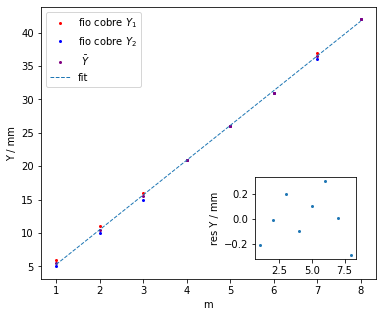

In [149]:
bt = 0.25
ubt = 0.01

def analisa_fios( data_sets , *args ):
    n = len( data_sets )
    fig = plt.figure( figsize = ( 6 *n ,5  ) )
    gaxs = fig.add_gridspec(  ncols = n , hspace=0,wspace = 0 )
    axs  = gaxs.subplots( sharey = "row")

    



    for i , data_set in enumerate(data_sets) : 
        
        if n == 1 : 
            ax = axs
        else :
            ax = axs[i]
            
            
        y1 , y2 = data_set[:,1],data_set[:,2]
        Y   = ( y1 + y2 ) / 2 
        m   = data_set[:,0]
        bexp = d * lambda0 / ( nar_t * Y) * m * 1000000

        ax.plot( m , y1 , "r." ,label = args[i] + r" $Y_1$" , markersize = markersize )
        ax.plot( m , y2 , "b.",label = args[i]+r" $Y_2$" , markersize = markersize )
        ax.plot( m , Y , "." ,label = r" $\bar{Y}$", color = "purple" , markersize = markersize )

        result = sps.linregress( m , Y )
        dec , o = result.slope , result.intercept 
        udec , uo = result.stderr , result.intercept_stderr

        print( "declive = " , dec , "\nordenada = " , o )
        print( "incerteza declive = " , udec , "\nincerteza ordenada = " , uo )
        print( "incerteza relativa declive = " , udec / dec * 100 , " %")
        print( "----")
        bexp = d * lambda0 / ( nar_t * dec ) *1e6
        print( "bexp = " , bexp )
        print( "u(bexp) = " , bexp *udec / dec  , " %" )
        print( "----")

        ax.plot( m , m * dec + o , "--" , linewidth = 1 , label = "fit" )
        axres = inset_axes(ax, width="30%", height="30%", loc= 4 , borderpad = 2 )

        axres.plot( m , m * dec + o - Y , "." ,label= args[i] , markersize = markersize )
        axres.set_ylabel( "res Y / mm")
        ax.legend( loc = 2 )
        ax.set_xlabel( "m")
        if i == 0 :
            ax.set_ylabel( "Y / mm")




    return bexp , axs  , fig
    
bexp , ax, fig  = analisa_fios( [data_22] , "fio cobre")
print( "erro palmer = " , np.abs( bexp - bt ) / bt * 100 , " %")


## Parte 2.3 - padrão de interferência cabelos

declive =  12.05 
ordenada =  1.0
incerteza declive =  0.13228756555320811 
incerteza ordenada =  0.3622844186546773
incerteza relativa declive =  1.0978221207735113  %
----
bexp =  0.09103378277560918
u(bexp) =  0.0009993890046875442  %
----
declive =  16.15 
ordenada =  0.25
incerteza declive =  0.08660254037838465 
incerteza ordenada =  0.2371708245124663
incerteza relativa declive =  0.5362386401138368  %
----
bexp =  0.06792303916074865
u(bexp) =  0.00036422958151958746  %
----


Text(0.5, 1.0, 'Cabelo Miguel')

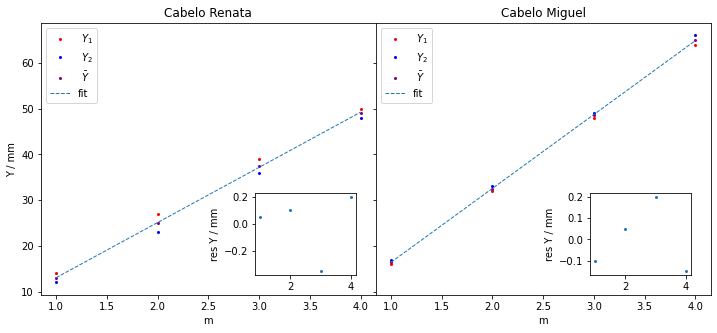

In [152]:
Rarr = data_23[:4,:]
Marr = data_23[4:,:]
b , axs , fig = analisa_fios( [Rarr,Marr],"", "")

axs[0].set_title( "Cabelo Renata" )
axs[1].set_title( "Cabelo Miguel")